# The Results of the First Lactose Intolerant Survey

After a month of suspense, the time has finally come to analyze the results of our [first community survey](https://docs.google.com/forms/d/1MnXgu38tTP3Kpvp6OmUIh_OZyXfxglsnS9sk73X6zZI)!

[Your](https://www.reddit.com/r/lactoseintolerant/) responses were the perfect balance of informative, constructive, critical, and comedy that I was hoping for.
We are so alike in many ways and beautifully different in many other ways.
I want to sincerely thank everyone who took the time to answer these questions and provide feedback.

## Let's analyze some data!

Instead of showing a bunch of pie charts, I thought it would be fun to get nerdy with the analysis.
Let's load up [pandas](https://pandas.pydata.org/), the [seaborn](https://seaborn.pydata.org) visualization library, and our survey results. I also use [VADER](https://github.com/cjhutto/vaderSentiment) so sift through the sentiment in some of your free-text responses.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pprint import pprint
sns.set()
analyzer = SentimentIntensityAnalyzer()
data = pd.read_csv("./lactose_1.csv")

## How'd we do?

Not great, but not a bad turnout either!

In [2]:
total_subscribers = 6155
survey_responses = len(data)
participation = survey_responses / total_subscribers
print(f"Wow! We had {survey_responses} responses!")
print(f"Based on our {total_subscribers:,} total subscribers,")
print(f"that's {participation:.2%} participation!")

Wow! We had 398 responses!
Based on our 6,155 total subscribers,
that's 6.47% participation!


## Some quick helper functions.

We have a bunch of data to plot and to avoid repeating a bunch of code, I'm going to a few helper functions here:

In [3]:
def totals(df, column_name, title, sort=True):
    """Bar charts!"""
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(111)
    plt.rcParams['font.size'] = 16
    vc = df[column_name].value_counts(sort=sort)
    vc.plot(kind='pie', ax=ax, autopct='%1.1f%%')
    plt.title(title)
    plt.show()

In [4]:
def compare(df, column_a, column_b, title, normalize=False):
    """Heatmaps!"""
    plt.figure(figsize=(8,4))
    crosstab = pd.crosstab(df[column_a], data[column_b], normalize=normalize)
    ax = sns.heatmap(crosstab, cmap='Blues', annot=True, cbar=False, fmt='g')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

## Demographics

I asked a few questions about who you were. I sourced these common questions and presets from other demographic surveys.

In [5]:
column_age = 'How old are you now?'
column_gender = 'What gender do you identify with?'
column_ethnicity = 'What is your ethnicity?'

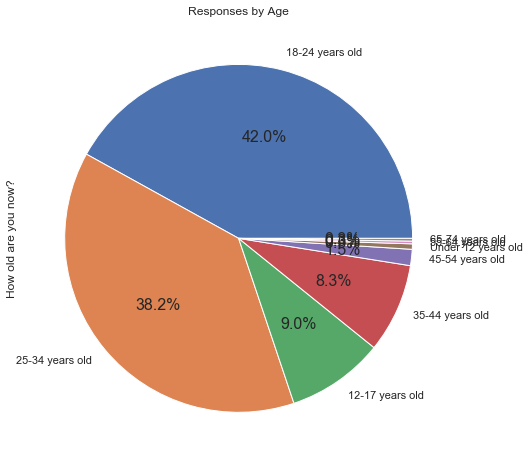

In [6]:
totals(data, column_age, 'Responses by Age')

We received a lot of different responses for gender! Please forgive me for reducing the dimensions here, just trying to tighten up some of these heatmaps.

In [7]:
def compact_gender(value):
    if any(x in value.lower() for x in ('binary', 'genderqueer', 'other')):
        return 'Non-binary'
    if any(x in value.lower() for x in ('trans', 'demi', 'mostly')):
        return 'Transgender'
    return value

data[column_gender] = data[column_gender].apply(compact_gender)

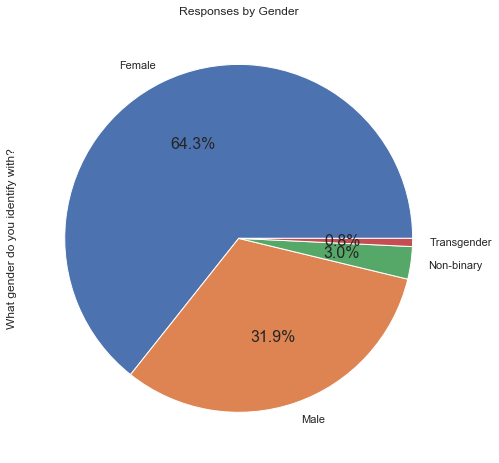

In [8]:
totals(data, column_gender, 'Responses by Gender')

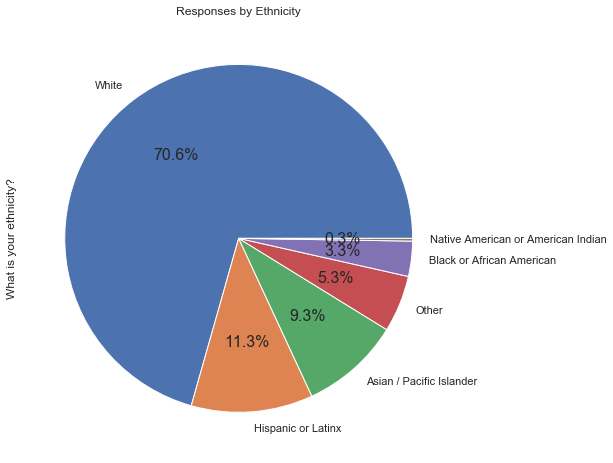

In [9]:
totals(data, column_ethnicity, 'Responses by Ethnicity')

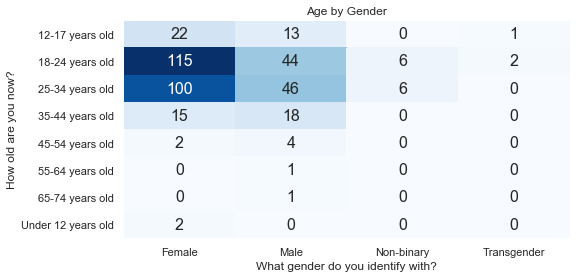

In [10]:
compare(data, column_age, column_gender, 'Age by Gender')

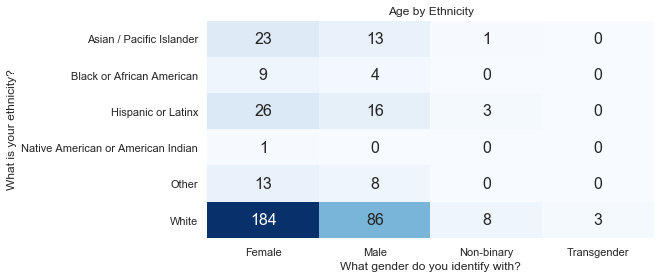

In [11]:
compare(data, column_ethnicity, column_gender, 'Age by Ethnicity')

## Who are you here for?

It appears most of us are here for ourselves.
A few of you really should subscribe!
Shout-out to the parent with the second generation lactose intolerant and the world's greatest friend.

In [12]:
column_who = 'Who are you subscribed to /r/lactoseintolerant for?'

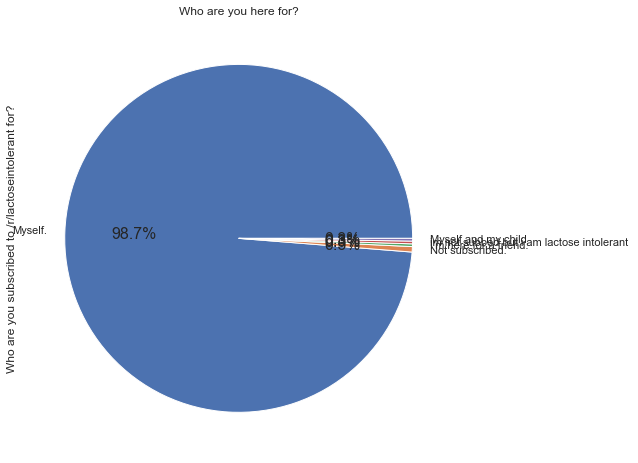

In [13]:
totals(data, column_who, 'Who are you here for?')

## Lactose Intolerant Realizations

It appears that most of us have recently realized that we are lactose intolerant. There also appear to be a lot of veteran lactose intolerant people in the crowd! Congratulations?!

In [14]:
column_when = 'When did you or a loved one realize that you or a loved one was lactose intolerant?'

In [15]:
def compact_age(value):
    if value == 'Under 12 years old':
        return '0-12 YO'
    if value == '12-17 years old':
        return '12-17 YO'
    if value == '18-24 years old':
        return '18-24 YO'
    if value == '25-34 years old':
        return '25-34 YO'
    if value == '35-44 years old':
        return '35-44 YO'
    if value == '45-54 years old':
        return '45-54 YO'
    if value == '55-64 years old':
        return '55-64 YO'
    if value == '65-74 years old':
        return '65-74 YO'
    return value

data[column_age] = data[column_age].apply(compact_age)
data[column_when] = data[column_when].apply(compact_age)

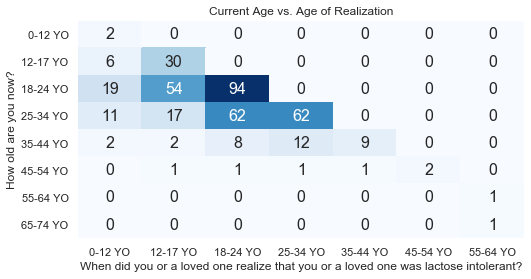

In [16]:
compare(data, column_age, column_when, 'Current Age vs. Age of Realization')

## It's milk time!

It looks like latose-free milk and almond milk are the champs!
I'm afraid that I negatively biased Oat milk by not having it as an option, so my bad.

In [17]:
column_milk = 'What is your go-to milk?'

In [18]:
def compact_milk(value):
    if any(x in value.lower() for x in (
        "don’t", "don't", 'no milk', 'none', 'stopped', 'water')):
        return 'No Milk'
    if any(x in value.lower() for x in ('oat',)):
        return 'Oat Milk'
    if any(x in value.lower() for x in ('skim',)):
        return 'Skim Milk'
    return value

data[column_milk] = data[column_milk].apply(compact_milk)

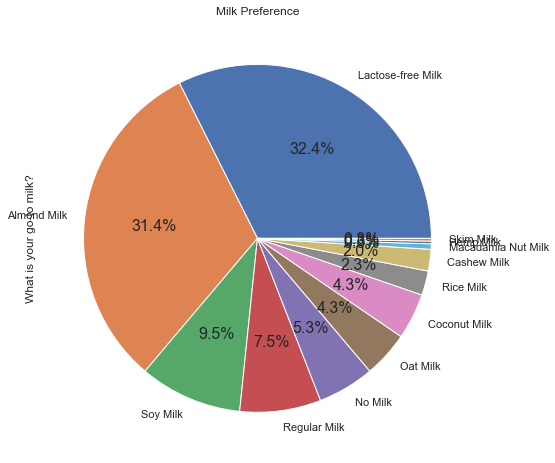

In [19]:
totals(data, column_milk, 'Milk Preference')

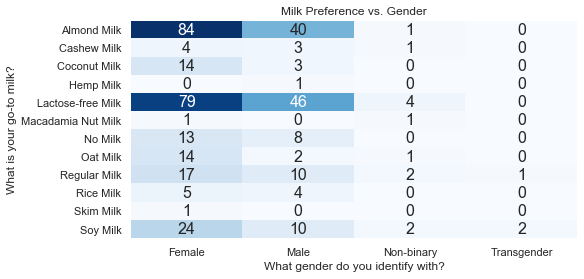

In [20]:
compare(data, column_milk, column_gender, 'Milk Preference vs. Gender')

## Poop time!

A lot of you loved this question and a few of you _really_ did not like this question.
Given that this is Reddit, I thought saying "shit" would make the survey more fun.
A sincere apology to the 12-year-old that felt this was unprofessional.

It was no surprise that we seem to poop a lot. Some of us are more regular than others and a lot of you give very few shits per day (SPD)!

In [21]:
column_shit = 'How many times a day do you have to shit?'

In [22]:
def compact_shit(value):
    if value == 'Once every few days.':
        return '0x'
    if value == 'Once a day.':
        return '1x'
    if value == 'Twice a day.':
        return '2x'
    if value == 'Three times a day.':
        return '3x'
    if value == 'More than three times a day.':
        return '4x'

data[column_shit] = data[column_shit].apply(compact_shit)

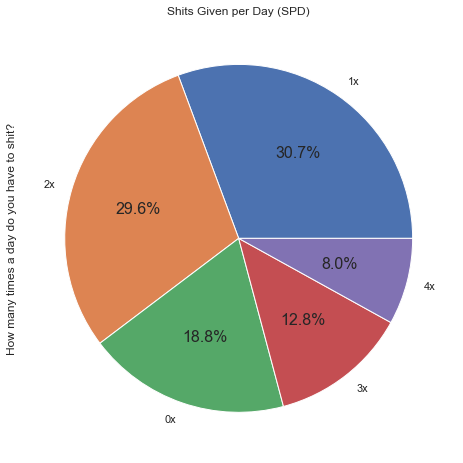

In [23]:
totals(data, column_shit, 'Shits Given per Day (SPD)')

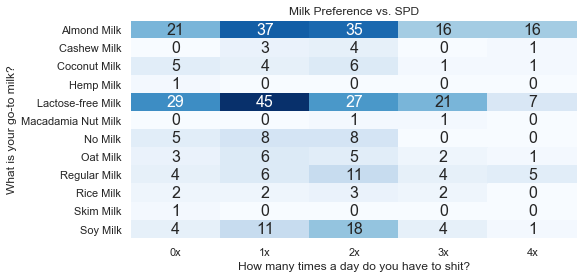

In [24]:
compare(data, column_milk, column_shit, 'Milk Preference vs. SPD')

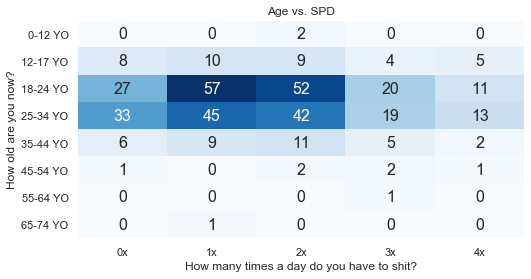

In [25]:
compare(data, column_age, column_shit, 'Age vs. SPD')

## Milksplaining

Explaining that you're lactose intolerant to people is a major part of life.
I was shocked that there are many of you that don't tell anyone at all!
I think you're really missing an opportunity to build a network of people that look out for your tummy!
E.g. I am pretty vocal about my lactose intolerance and now most of my coworkers help me avoid food that contains dairy.
Pretty convenient!

In [26]:
column_tell_before = "How many people do you have to tell that you're lactose intolerant on a weekly basis?"
column_tell = 'People told weekly'
data.rename(columns={column_tell_before: column_tell}, inplace=True)

In [27]:
def compact_tell(value):
    if value == "I never tell anyone that I'm lactose intolerant.":
        return '0x'
    if value == "I tell one person per week that I'm lactose intolerant.":
        return '1x'
    if value == "I tell two to three people per week that I'm lactose intolerant.":
        return '2-3x'
    if value == "I tell so many god damn people that I'm lactose intolerant each week that I've lost count.":
        return '4+'
    
data[column_tell] = data[column_tell].apply(compact_tell)

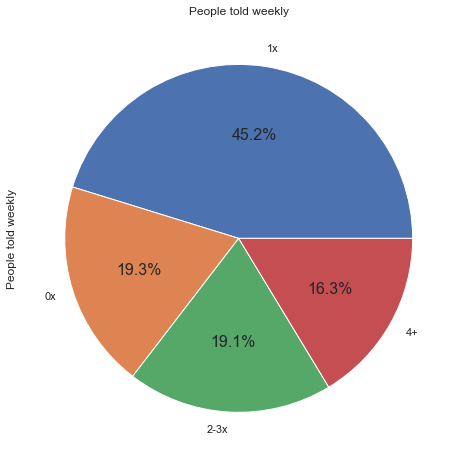

In [28]:
totals(data, column_tell, 'People told weekly')

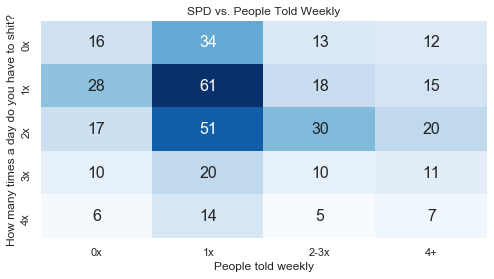

In [29]:
compare(data, column_shit, column_tell, 'SPD vs. People Told Weekly')

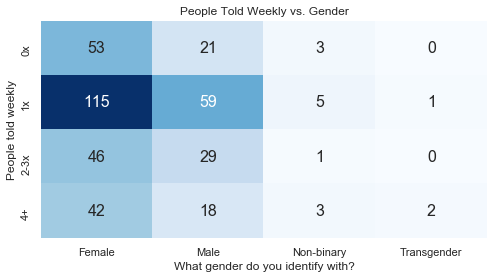

In [30]:
compare(data, column_tell, column_gender, 'People Told Weekly vs. Gender')

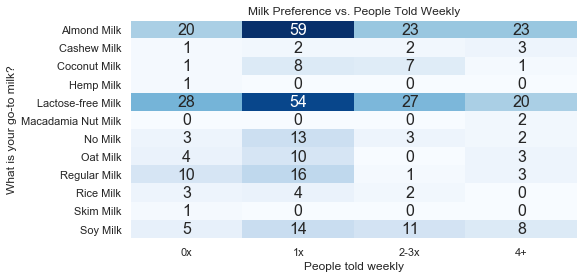

In [31]:
compare(data, column_milk, column_tell, 'Milk Preference vs. People Told Weekly')

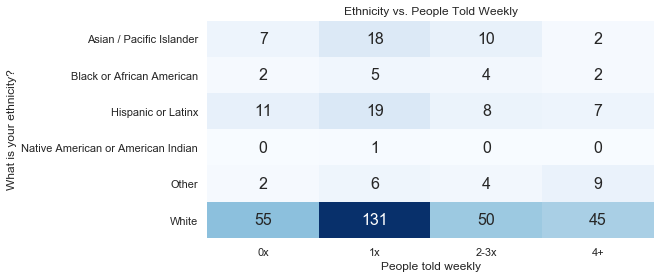

In [32]:
compare(data, column_ethnicity, column_tell, 'Ethnicity vs. People Told Weekly')

## Story time

Lactose intolerant stories are kind of the best.
We've all put ourselves into awful situations and our solutions require rapid, creative thinking.
I posed the ficticious pizzeria cheese consumption challenge to you all and you did not dissapoint.

In [33]:
column_what_do_before = (
    'In a moment of weakness, you eat an entire cheese pizza at a pizzeria filled with people. '
    'You forgot your pills and you are in trouble. What do you do?')
column_what_do = "What do you do?"
data.rename(columns={column_what_do_before: column_what_do}, inplace=True)

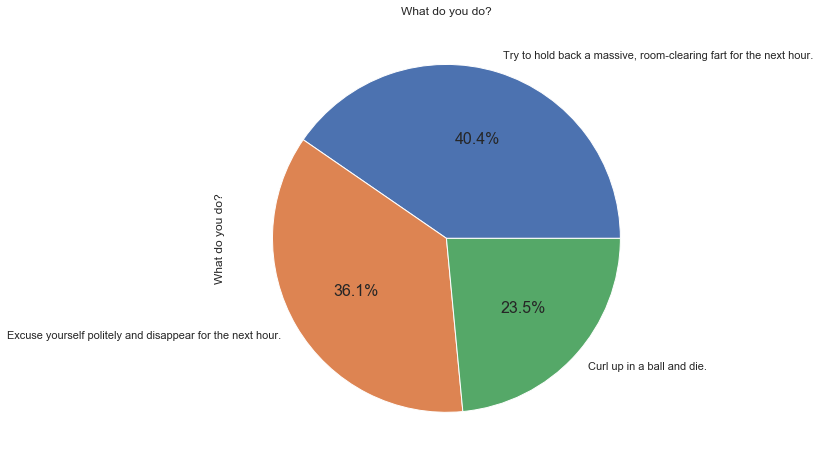

In [34]:
stories_duplicated = data[data[column_what_do].duplicated()]
totals(stories_duplicated, column_what_do, 'What do you do?')

### The 15 worst stories

There were too many to print, so using sentiment analysis, I've picked the 15 most negative responses:

In [35]:
story_data = []
stories_not_duplicated = data[~data[column_what_do].duplicated(False)]
for index, row in stories_not_duplicated.iterrows():
    story = row[column_what_do]
    ps = analyzer.polarity_scores(story)
    story_data.append({'story': story, 'score': ps['compound']})
story_df = pd.DataFrame(story_data).sort_values(['score'])
pprint(list(story_df.head(15)['story'].values))

['I’m probably drunk. I ignore the problem until the following moment, when I '
 'have a combination of nausea from the hangover and diarrhea from the cheese. '
 'I can’t decide which end needs to explode first. I shit my pants while I '
 'throw up.',
 'Vomit violently. My gas is so bad it makes me throw up. I’m *very* '
 'lactose-intolerant.',
 'It takes 5 hours to pass through, after which horrendous anxiety kicks in '
 'accompanied with acidic poo.. so basically drink a lot of water and get hold '
 'of moist toilet tissue to reduce the damage (i.e. a very, very raw ring)',
 'Go to a bathroom and cry in pain for an hour',
 'Not happening, I’d rather actually die',
 'Die ',
 'Go home and shit!',
 'I have self-control wtf',
 'Farting, exploding, stinking poops. More seriously I get ear infections from '
 'dairy. Which star itchy but can become serious needing antibiotics. So does '
 'my child. ',
 'Hold in the fart and belch then shit fur 4 hours',
 'immediately rush home, I sometimes 

## Restroom Standards

It seems like most of us take the safe route when pooping.
Clean, restrooms are a must, even if they're unfamiliar.
Some of us have high standards and will only poop at home.
However, get a load of these brave souls that will go for it, no matter what!

In [36]:
column_restroom = 'What is your standard for usable public restrooms?'

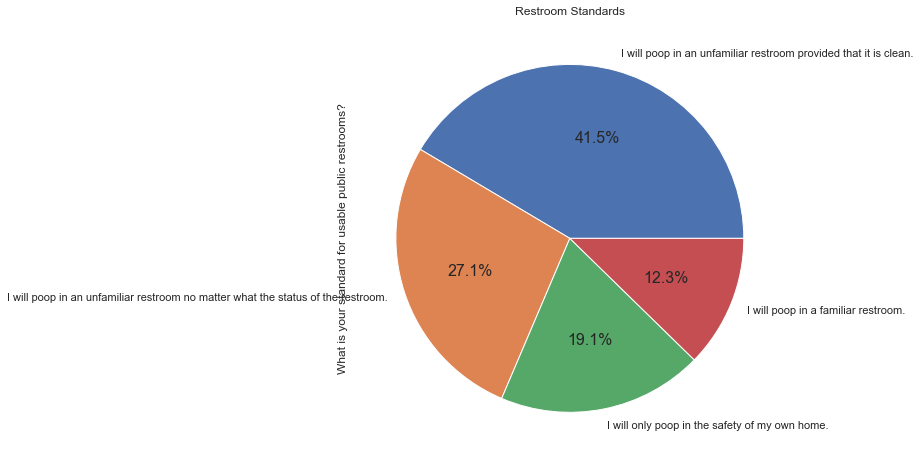

In [37]:
totals(data, column_restroom, 'Restroom Standards')

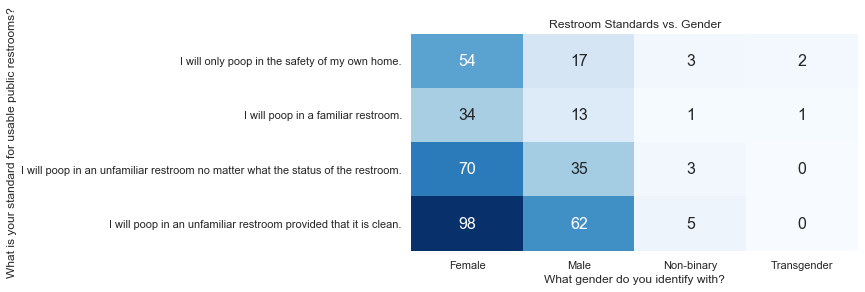

In [38]:
compare(data, column_restroom, column_gender, 'Restroom Standards vs. Gender')

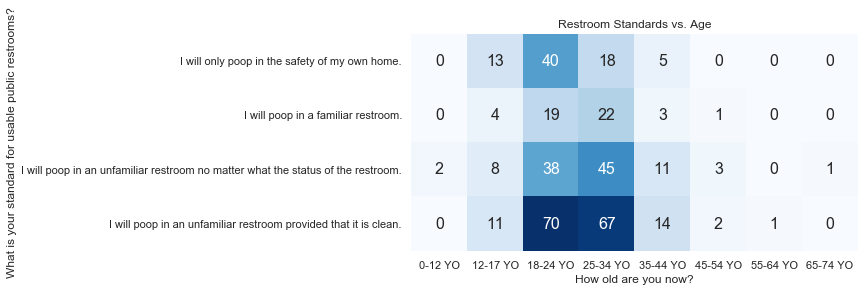

In [39]:
compare(data, column_restroom, column_age, 'Restroom Standards vs. Age')

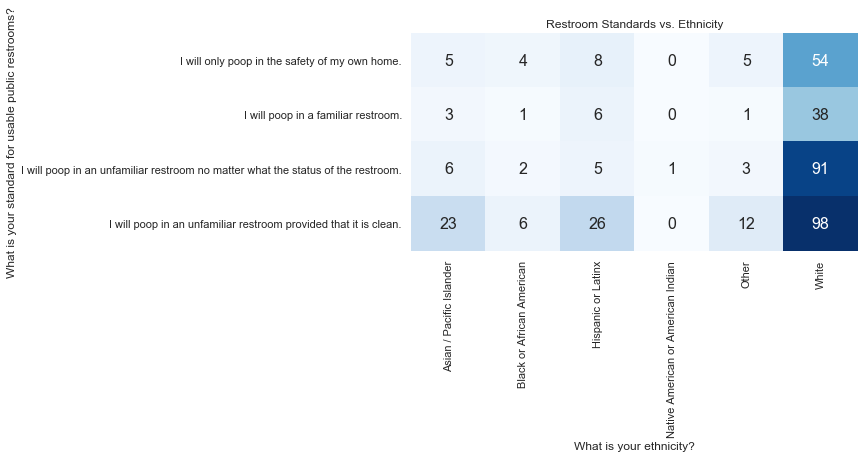

In [40]:
compare(data, column_restroom, column_ethnicity, 'Restroom Standards vs. Ethnicity')

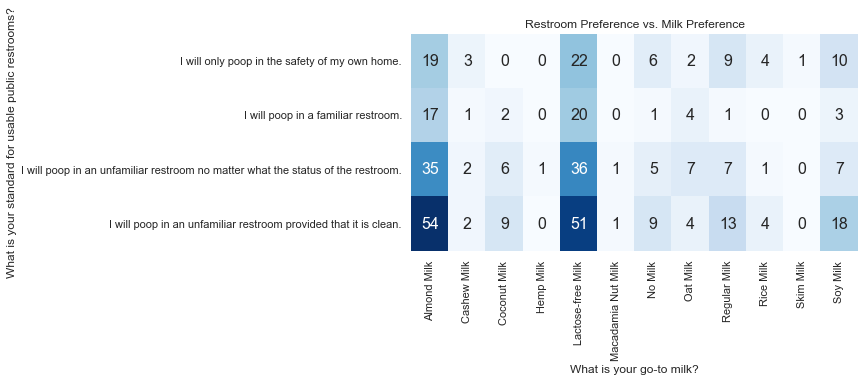

In [41]:
compare(data, column_restroom, column_milk, 'Restroom Preference vs. Milk Preference')

## Don't go alone! Take this!

The true value of this Reddit can be summarized by this question.
I've personally learned so many things from you all over the past several years and this question yeilds some of the best remedies and preventative solutions!

What is most remarkable here is how many of you are doing nothing about it! C'mon, what are you doing to yourselves?!

Some patterns around lactase enzymes, probiotics, Gas-X/Beano and Immodium/Loperamide here.

In [42]:
column_prevention = 'What do you take to prevent gas-attacks?'

In [43]:
def compact_prevention(value):
    if any(x in value.lower() for x in ('loperamide', 'imodium', 'immodium', 'anti-diarrheal')):
        return 'Loperamide/Imodium.'
    if any(x in value.lower() for x in ('enzymes and', 'lactase+')):
        return 'Lactaid/Lactase Enzymes.'
    if any(x in value.lower() for x in ('probiotics',)):
        return 'Probiotics.'
    if any(x in value.lower() for x in ('beano', 'gas-x', 'gas x')):
        return 'Galactosidase/Gas-X/Beano.'
    if any(x in value.lower() for x in ('nothing',)):
        return 'Nothing'
    if any(x in value.lower() for x in ('tea', 'water')):
        return 'Tea/Water'
    if any(x in value.lower() for x in ('kaopectate', )):
        return 'Tea/Water'
    if any(x in value.lower() for x in (
        'no dairy', "don’t", 'tried it all', 'completely removed', 
        "don't eat", 'rarely', 'not eating', 'avoid')):
        return 'Abstain'
    if any(x in value.lower() for x in ('pepto', )):
        return 'Tums/Pepto bismol'
    return value

data[column_prevention] = data[column_prevention].apply(compact_prevention)

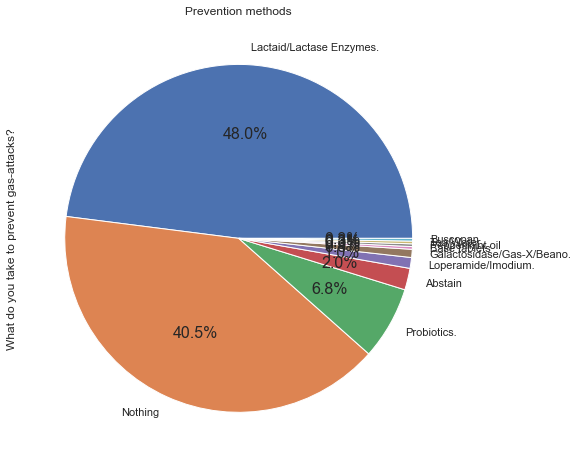

In [44]:
totals(data, column_prevention, 'Prevention methods')

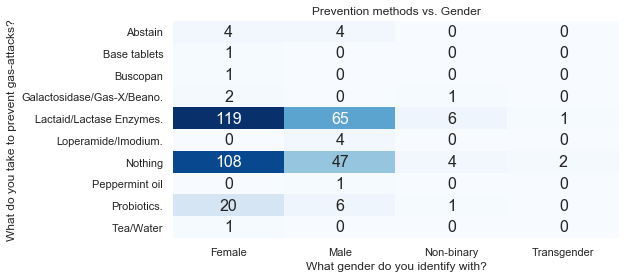

In [45]:
compare(data, column_prevention, column_gender, 'Prevention methods vs. Gender')

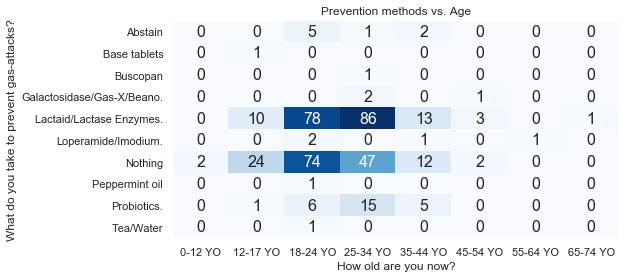

In [46]:
compare(data, column_prevention, column_age, 'Prevention methods vs. Age')

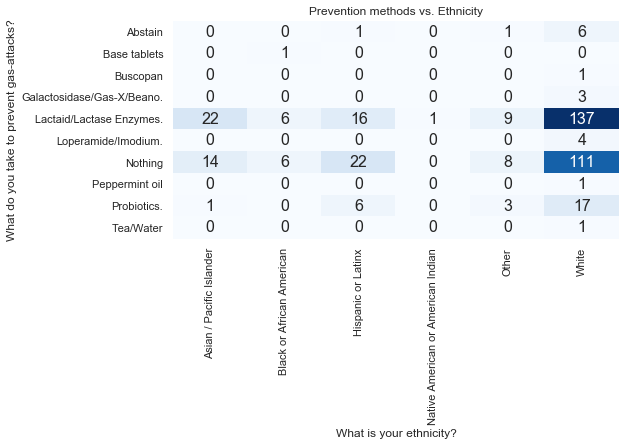

In [47]:
compare(data, column_prevention, column_ethnicity, 'Prevention methods vs. Ethnicity')

## When it's too late...

It appears that we reach for the same preventative tools when we realize it is too late.
Seeing an increase in gas, diarrhea and IBS control in this section.
Also a lot of prayer, crying, and suffering.

In [48]:
column_too_late = 'What do you take after you realize it is too late to minimize the damage?'

In [49]:
data[column_too_late] = data[column_too_late].apply(compact_prevention)

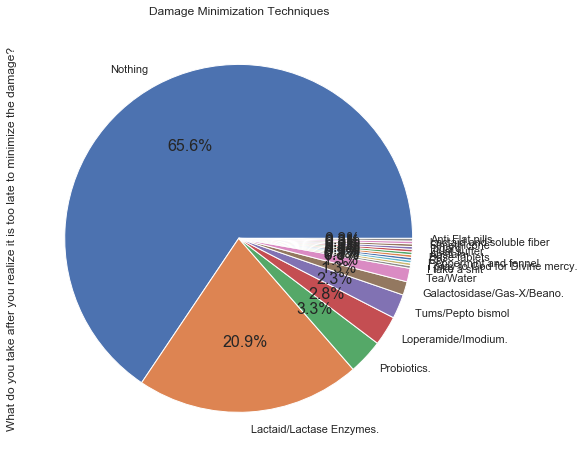

In [50]:
totals(data, column_too_late, 'Damage Minimization Techniques')

## Interviews!

Turns out a lot of you are willing to be interviewed!
I'll be coming up with some great interview questions and will try reaching out to some of you in the future!
I'm thinking a podcast could be pretty fun!

In [51]:
column_interview = 'Would you ever be willing to be interviewed?'

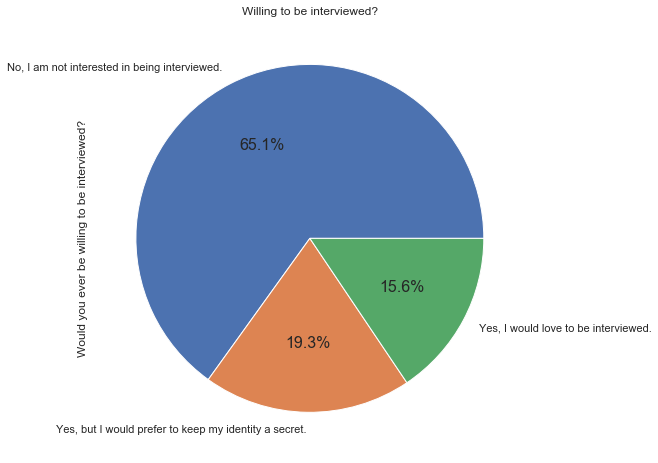

In [52]:
totals(data, column_interview, 'Willing to be interviewed?')

## What'd ya think of the survey?

Your feedback was extremely helpful here. Turns out 16 questions was just right for most of you.

I now also understand that some of you are here for the comedy and some of you are here for the science.
I can see how people would really want to take this stuff seriously and I'll try to be more respectful of that next time.

In [53]:
column_survey = 'What did you think of this first survey?'

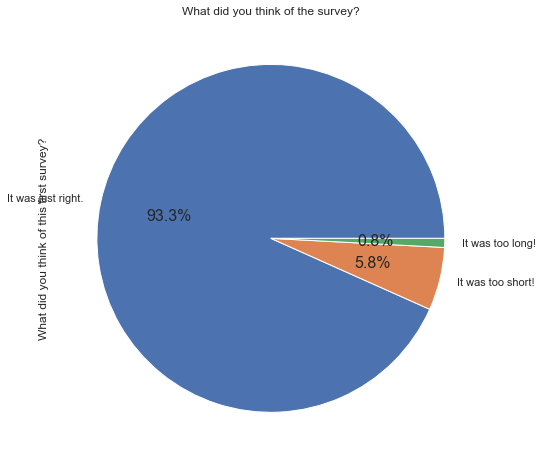

In [54]:
totals(data[data[column_survey].duplicated()], column_survey, 'What did you think of the survey?')

In [55]:
survey_data = []
survey_not_duplicated = data[~data[column_survey].duplicated(False)]
for index, row in survey_not_duplicated.iterrows():
    survey = row[column_survey]
    ps = analyzer.polarity_scores(survey)
    survey_data.append({'survey': survey, 'score': ps['compound']})
survey_df = pd.DataFrame(survey_data).sort_values(['score'])

### Most negative feedback

In [56]:
pprint(list(survey_df.head(15)['survey'].values))

["I don't care if you are a professional or not, but make the damn survey "
 'professional.',
 'It was weird and unprofessional. ',
 'shit',
 "Questions didn't seem very insightful (sorry no offense)",
 'no thoughts',
 'No opinions',
 "Doesn't seem to account for folks who have very recently suspected lactose "
 'intolerance as being responsible for symptoms which have gone on for years '
 '(and still in the very early days of trying to avoid dietary triggers)..',
 "Answer choices were limiting. I prefer to use a bathroom I'm comfortable "
 "with but I'll use any bathroom whem desperate. I poo once per day but if I "
 'have milk it may be a few times in a day. Asking how often you mention '
 'intolerance instead of frequency may yield more informative results. ',
 'meh',
 'Question for undiagnosed or diagnosed',
 'Why does this exist?',
 'yawn',
 '.',
 'Maybe not detailed enough ',
 'Want to see everyone else’s answers! ']


### Most positive feedback

In [57]:
pprint(list(survey_df.tail(15)['survey'].values))

['Question for undiagnosed or diagnosed',
 'Why does this exist?',
 'yawn',
 '.',
 'Maybe not detailed enough ',
 'Want to see everyone else’s answers! ',
 'answers for what do you take questions should allow you to pick more than '
 'one',
 'Question 7 needs a "it varies like a roller coaster" option',
 'Many non scientific words like “ shit”',
 'Ideally it would have allowed multiple answers. ',
 'It was fun!',
 "I'd have loved to be able to pick more than one option in some questions",
 'Best survey EVER',
 'It was immensely funny and I like the way you worded the questions!',
 "Would've been nice to have questions about where you live "
 '(countries/regions), living situation, and how easy it is for you to avoid '
 'consuming/being unpleasantly surprised by the prescence of dairy dairy '
 '(either shopping, consuming stuff made in a home, consuming stuff made '
 'outside of a home), and how easy it is to access lactose-free products, as '
 'well as how easy it is to access lactose 

# Parting words

I hope you found this interesting! Make sure to tell your lactose intolerant friends to [join our subreddit](https://www.reddit.com/r/lactoseintolerant/)! Maybe next time, we can get more participation!